## WeatherPy

### Analysis

As suspected, the weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.

Neither humiditiy, cloudiness nor wind speed have direct relationships with the latitude. This applies to both the Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

There is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

There is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

670

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portsmouth
Processing Record 2 of Set 1 | tautira
Processing Record 3 of Set 1 | wukari
Processing Record 4 of Set 1 | namatanai
Processing Record 5 of Set 1 | saint-leu
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tyret pervaya
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | lafia
Processing Record 18 of Set 1 | zhigansk
Processing Record 19 of Set 1 | port hawkesbury
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 1 | punta 

Processing Record 37 of Set 4 | karlskoga
Processing Record 38 of Set 4 | tarakan
Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | lebanon
Processing Record 41 of Set 4 | esmeraldas
Processing Record 42 of Set 4 | nicoya
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | tamandare
Processing Record 45 of Set 4 | maceio
Processing Record 46 of Set 4 | acapulco
Processing Record 47 of Set 4 | pimentel
Processing Record 48 of Set 4 | northam
Processing Record 49 of Set 4 | severo-kurilsk
Processing Record 0 of Set 5 | miquelon
Processing Record 1 of Set 5 | bredasdorp
Processing Record 2 of Set 5 | darnah
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | lubango
Processing Record 5 of Set 5 | malindi
Processing Record 6 of Set 5 | mentok
City not found. Skipping...
Processing Record 7 of Set 5 | alotau
City not found. Skipping...
Processing Record 8 of Set 5 | whitehorse
Processing Record 9 of Set 5 | arraial do cabo
Process

Processing Record 27 of Set 8 | san matias
Processing Record 28 of Set 8 | odiongan
Processing Record 29 of Set 8 | samusu
City not found. Skipping...
Processing Record 30 of Set 8 | yellowknife
Processing Record 31 of Set 8 | doha
Processing Record 32 of Set 8 | minot
Processing Record 33 of Set 8 | rio grande
Processing Record 34 of Set 8 | kendari
Processing Record 35 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 36 of Set 8 | dhenkanal
Processing Record 37 of Set 8 | sharjah
Processing Record 38 of Set 8 | ilulissat
Processing Record 39 of Set 8 | concarneau
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | kimbe
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | tonantins
Processing Record 44 of Set 8 | yirol
City not found. Skipping...
Processing Record 45 of Set 8 | iquique
Processing Record 46 of Set 8 | teahupoo
Processing Record 47 of Set 8 | marathon
Processing Record 48 of Set 8 | hearst
Processing Record 49 o

Processing Record 18 of Set 12 | west plains
Processing Record 19 of Set 12 | laguna
Processing Record 20 of Set 12 | naryan-mar
Processing Record 21 of Set 12 | solton
Processing Record 22 of Set 12 | krasnoselkup
Processing Record 23 of Set 12 | portland
Processing Record 24 of Set 12 | morristown
Processing Record 25 of Set 12 | leogane
Processing Record 26 of Set 12 | healesville
Processing Record 27 of Set 12 | quang ngai
Processing Record 28 of Set 12 | missoula
Processing Record 29 of Set 12 | presidencia roque saenz pena
Processing Record 30 of Set 12 | champerico
Processing Record 31 of Set 12 | gizycko
Processing Record 32 of Set 12 | uyuni
Processing Record 33 of Set 12 | callaway
Processing Record 34 of Set 12 | jieznas
Processing Record 35 of Set 12 | eirunepe
Processing Record 36 of Set 12 | rwamagana
Processing Record 37 of Set 12 | birjand
Processing Record 38 of Set 12 | grand gaube
Processing Record 39 of Set 12 | noumea
Processing Record 40 of Set 12 | barberton
Proc

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          619
Lat           619
Lng           619
Max Temp      619
Humidity      619
Cloudiness    619
Wind Speed    619
Country       619
Date          619
dtype: int64

In [5]:
# Display the City Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portsmouth,50.80,-1.09,55.99,87,12,4.63,GB,1595376734
1,tautira,-17.73,-149.15,84.20,66,40,5.82,PF,1595376550
2,wukari,7.85,9.78,73.63,91,87,8.68,NG,1595376734
3,namatanai,-3.67,152.43,84.33,70,27,6.13,PG,1595376734
4,saint-leu,-21.15,55.28,64.40,68,90,5.82,RE,1595376734


In [6]:
# Check data stats
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,6.190000e+02
mean,20.064039,15.113796,68.576543,71.504039,47.537964,7.324087,1.595377e+09
std,33.354642,90.378849,13.113569,19.110001,38.513938,4.891620,8.624814e+01
min,-54.800000,-179.170000,23.000000,3.000000,0.000000,0.220000,1.595376e+09
25%,-9.735000,-67.820000,58.165000,62.500000,4.000000,3.680000,1.595377e+09
50%,27.230000,20.040000,70.000000,75.000000,43.000000,5.990000,1.595377e+09
75%,47.875000,92.690000,78.370000,85.000000,89.000000,9.720000,1.595377e+09
max,78.220000,179.320000,102.110000,100.000000,100.000000,27.510000,1.595377e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_df[(city_data_df["Humidity"] > 100)].index

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portsmouth,50.80,-1.09,55.99,87,12,4.63,GB,1595376734
1,tautira,-17.73,-149.15,84.20,66,40,5.82,PF,1595376550
2,wukari,7.85,9.78,73.63,91,87,8.68,NG,1595376734
3,namatanai,-3.67,152.43,84.33,70,27,6.13,PG,1595376734
4,saint-leu,-21.15,55.28,64.40,68,90,5.82,RE,1595376734


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs Temperature Plot

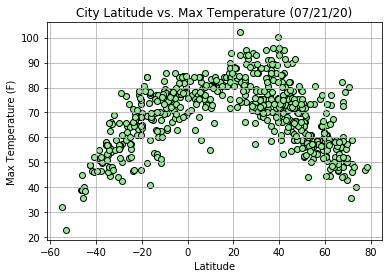

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### The weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.

## Latitude vs Humidity Plot

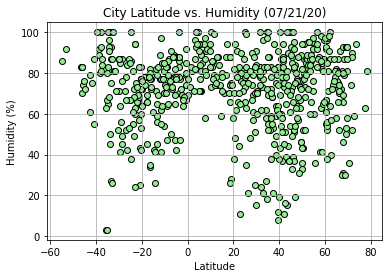

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude and humiditiy have no direct relationship.

## Latitude vs Cloudiness Plot

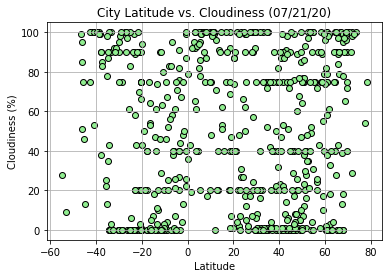

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude and cloudiness have no direct relationship.

## Latitude vs Wind Speed Plot

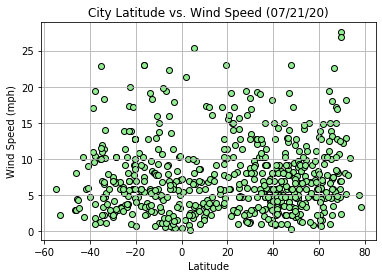

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Latitude and wind speed have no direct relationship.

## Linear Regression

In [14]:
# y = mx + b  (b = intercept, m = slope, x,y remain the same)
# r squared values range from 0 to 1 or 0% to 100%; the higher the r squared, the better the models fits the data

# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Max Temperature vs Latitude Linear Regression

The r-squared is: 0.43315605118409395


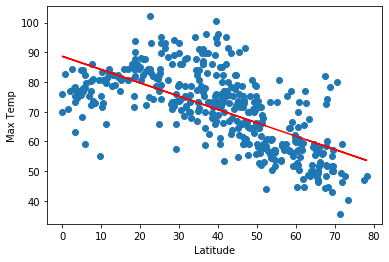

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

### In the Northern Hemisphere there is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

The r-squared is: 0.6145918713413588


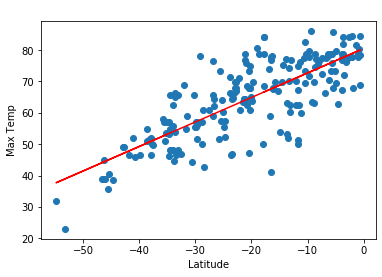

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

### In the Southern Hemisphere there is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

## Humidity vs Latitude Linear Regression

The r-squared is: 0.008086383164709842


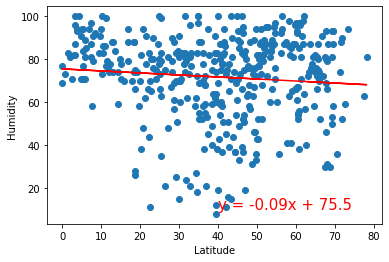

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

### In the Northern Hemisphere there is no correlation between humidity and latitude.

The r-squared is: 0.001811740980661546


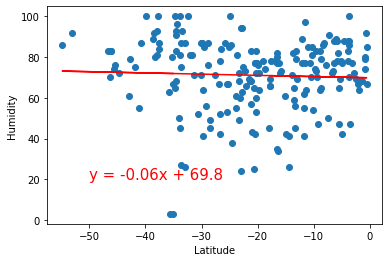

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

### In the Southern Hemisphere there is no correlation between humidity and latitude.

## Cloudiness (%) vs Latitude Linear Regression

The r-squared is: 0.004649032415707099


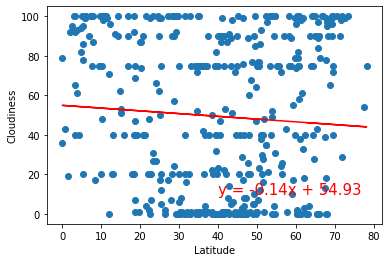

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

### In the Northern Hemisphere there is no correlation between cloudiness and latitude.

The r-squared is: 0.03633953341872236


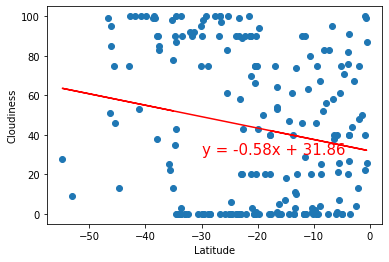

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

### In the Southern Hemisphere there is no correlation between cloudiness and latitude.

## Wind Speed (mph) vs Latitude Linear Regression

The r-squared is: 0.0077981186944688285


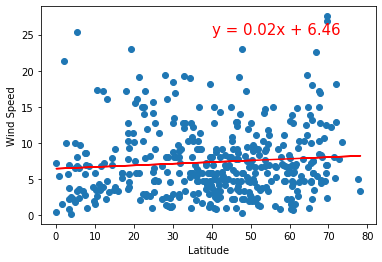

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

### In the Northern Hemisphere there is no correlation between windspeed and latitude.

The r-squared is: 0.0010986053058337005


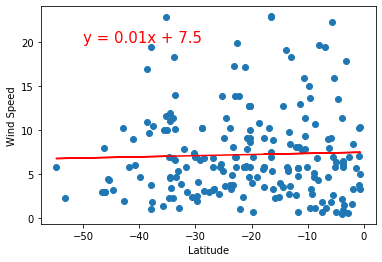

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

### In the Souththern Hemisphere there is no correlation between wind speed and latitude.